In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("MYAPP").getOrCreate()

In [2]:
csv_files = ["gs://dataproc-staging-us-central1-993494830844-njn58my5/data/fruit1.csv",
             "gs://dataproc-staging-us-central1-993494830844-njn58my5/data/fruit2.csv",
             "gs://dataproc-staging-us-central1-993494830844-njn58my5/data/fruit3.csv",
             "gs://dataproc-staging-us-central1-993494830844-njn58my5/data/fruit4.csv",
             "gs://dataproc-staging-us-central1-993494830844-njn58my5/data/fruit5.csv",
            ]
file_sizes = [11,21,31,41,51] 

df = spark.read.csv(csv_files, header=True, inferSchema=True)
df.show(5)

+----------+-----+
|     fruit|value|
+----------+-----+
|     apple|    1|
|    banana|    2|
|strawberry|    3|
|     grape|    4|
| blueberry|    5|
+----------+-----+
only showing top 5 rows



In [15]:
import time

def process_file(csv_path):
    start_time = time.time()
    
    df = spark.read.csv(csv_path, header=True, inferSchema=True)
    
    df = df.toDF(*[c.strip() for c in df.columns])
    
    agg_df = df.groupBy("fruit").avg("value")
    agg_df.show()
    
    elapsed_time = time.time() - start_time
    print(f"Processed {csv_path} in {elapsed_time:.2f} seconds.\n")
    return elapsed_time
    
    

In [25]:
run_times = []

for i, csv_path in enumerate(csv_files):
    print(f"Processing file: {csv_path}")
    runtime = process_file(csv_path)
    run_times.append(runtime)
    
    print("Current File Size (# of rows):", file_sizes[i])
    print(f"Run Time for current file: {runtime:.2f} seconds.\n")
    print("Run Times for all files (seconds):", run_times, "\n")

Processing file: gs://dataproc-staging-us-central1-993494830844-njn58my5/data/fruit1.csv
+----------+----------+
|     fruit|avg(value)|
+----------+----------+
|watermelon|       7.0|
|     apple|       1.0|
|      kiwi|       6.0|
| blueberry|       5.0|
|strawberry|       3.0|
|     grape|       4.0|
|      pear|       9.0|
| raspberry|      10.0|
|    banana|       2.0|
|    orange|       8.0|
+----------+----------+

Processed gs://dataproc-staging-us-central1-993494830844-njn58my5/data/fruit1.csv in 0.71 seconds.

Current File Size (# of rows): 11
Run Time for current file: 0.71 seconds.

Run Times for all files (seconds): [0.7091834545135498] 

Processing file: gs://dataproc-staging-us-central1-993494830844-njn58my5/data/fruit2.csv
+----------+----------+
|     fruit|avg(value)|
+----------+----------+
|watermelon|       7.0|
|     apple|       1.0|
|      kiwi|       6.0|
| blueberry|       5.0|
|strawberry|       3.0|
|     grape|       4.0|
|      pear|       9.0|
| raspberry

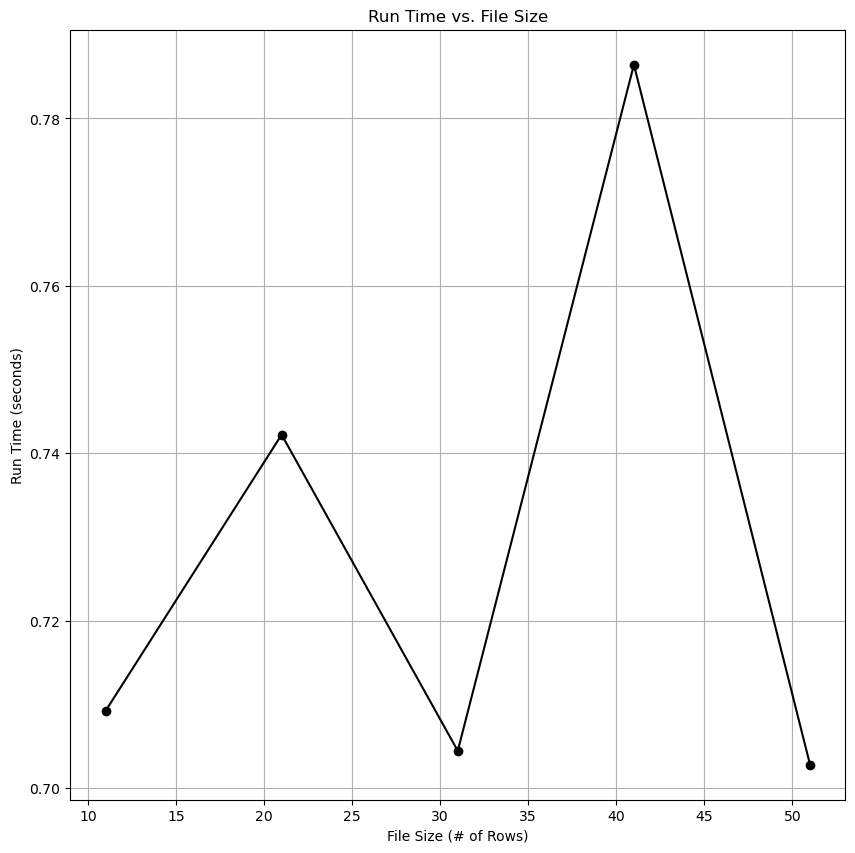

In [27]:
import matplotlib.pyplot as plt

file_sizes = [11,21,31,41,51]

run_times = [0.7091834545135498, 0.742206335067749, 0.7044222354888916, 0.7864236831665039, 0.7027637958526611] 

plt.figure(figsize=(10, 10))

plt.plot(file_sizes, run_times, marker='o', linestyle='-',color='black')

plt.title('Run Time vs. File Size')
plt.xlabel('File Size (# of Rows)')
plt.ylabel('Run Time (seconds)')
plt.grid(True)

plt.show()